# Pymaceuticals Inc.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='left')

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
print(df['Mouse ID'].nunique())

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
grouped_df = df.groupby('Mouse ID')
counts = grouped_df['Timepoint'].count()
outliers = counts[counts > 10]
print(f"duplicate Mouse ID: {outliers.index[0]}")

duplicate Mouse ID: g989


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
outliers_table = df[df['Mouse ID']==outliers.index[0]]
outliers_table

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df = df[df['Mouse ID']!=outliers.index[0]]
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
print(df['Mouse ID'].nunique())

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_group = df.groupby("Drug Regimen")
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = drug_group['Tumor Volume (mm3)'].mean()
median = drug_group['Tumor Volume (mm3)'].median()
var = drug_group['Tumor Volume (mm3)'].var()
std = drug_group['Tumor Volume (mm3)'].std()
sem = drug_group['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
tumor_summary = pd.DataFrame({'Mean Tumor Volume':mean, 'Median Tumor Volume':median, 'Tumor Volume Variance':var,
                              'Tumor Volume Std. Dev.':std, 'Tumor Volume Std. Err.':sem})
tumor_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_group['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

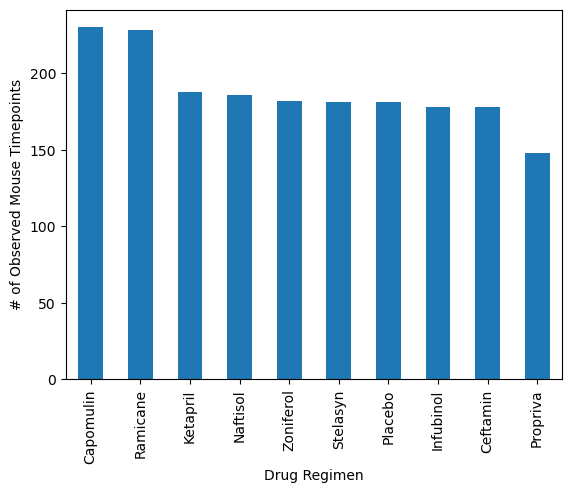

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
## RESOURCE TO ADD TO README: https://www.statology.org/pandas-plot-value-counts/
df['Drug Regimen'].value_counts().plot(kind='bar', ylabel='# of Observed Mouse Timepoints')
plt.show()

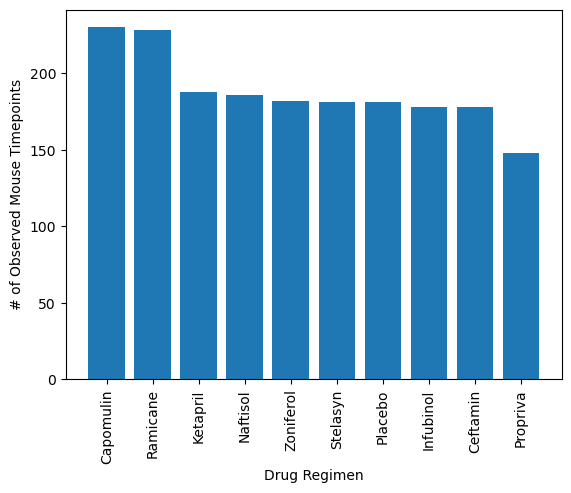

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
data = df['Drug Regimen'].value_counts()

plt.bar(data.index, data)
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

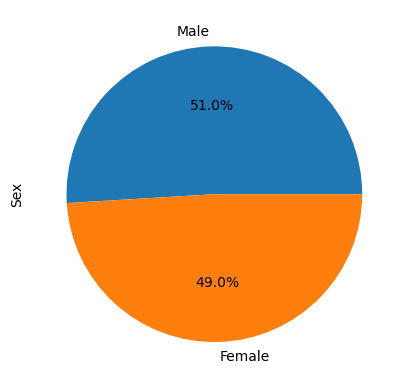

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
df['Sex'].value_counts().plot(kind='pie', ylabel='Sex', autopct='%1.1f%%')
plt.show()

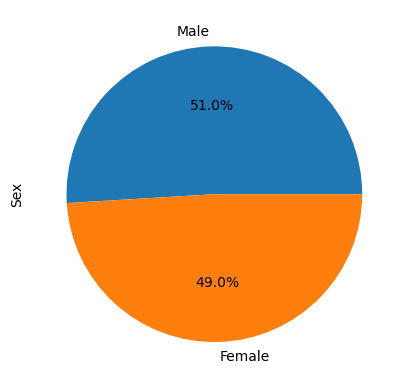

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_values = df['Sex'].value_counts()

plt.pie(sex_values, labels=sex_values.index, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
mouse = []
timepoint = []
tumor_vol = []
drug_reg = []

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

for drug in treatments:
    # subset original DataFrame for drug
    drug_data = df.loc[df['Drug Regimen']==drug]

    # find the last timepoint measured for drug
    max_timepoint = drug_data['Timepoint'].max()

    # subset the drug specific DataFrame for the last timepoint
    subset_max = drug_data.loc[drug_data['Timepoint']==max_timepoint].reset_index()

    # get values
    for i in range(0,len(subset_max)):
        mouse_id = subset_max['Mouse ID'][i]
        time_temp = max_timepoint
        tumor_temp = subset_max['Tumor Volume (mm3)'][i]
        drug_temp = drug
        
        # add the new DataFrame to the last_timepoint DataFrame
        mouse.append(mouse_id)
        timepoint.append(time_temp)
        tumor_vol.append(tumor_temp)
        drug_reg.append(drug_temp)

# add lists to a DataFrame
last_timepoint = pd.DataFrame({'Mouse ID': mouse,
                               'Timepoint': timepoint,
                               'Tumor Volume (mm3)': tumor_vol,
                               'Drug Regimen': drug_reg})
last_timepoint.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
0,b128,45,38.982878,Capomulin
1,t565,45,34.455298,Capomulin
2,l509,45,41.483008,Capomulin
3,g288,45,37.074024,Capomulin
4,r554,45,32.377357,Capomulin


In [14]:
# calculate IQR
#set empty list for bound values
lower = []
upper = []
iqr = []
median = []

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

for drug in treatments:
    # subset original DataFrame for drug
    drug_last = last_timepoint.loc[last_timepoint['Drug Regimen']==drug]

    # calculate quartiles, iqr, "minimum", and "maximum" values
    quantiles = drug_last['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lower_q = quantiles[0.25]
    upper_q = quantiles[0.75]

    iqr_temp = upper_q - lower_q
    median_temp = quantiles[.5]

    lower_bound = lower_q - 1.5*(iqr_temp)
    upper_bound = upper_q + 1.5*(iqr_temp)

    # add bounds to lists
    lower.append(lower_bound)
    upper.append(upper_bound)
    iqr.append(iqr_temp)
    median.append(median_temp)
    

    # check if there are outliers
    outliers_drug = drug_last.loc[(drug_last['Tumor Volume (mm3)'] < lower_bound) | (drug_last['Tumor Volume (mm3)'] > upper_bound)]
    print(f"{drug} potential outliers: {list(outliers_drug['Tumor Volume (mm3)'])}")
    

dictionary = {'IQR': iqr,
              'Median': median}
quartiles = pd.DataFrame(dictionary)
quartiles.index = treatments

quartiles


Capomulin potential outliers: []
Ramicane potential outliers: []
Infubinol potential outliers: []
Ceftamin potential outliers: []


,IQR,Median
Capomulin,7.781863,37.311846
Ramicane,7.527130,34.848627
Infubinol,4.931117,66.083066
Ceftamin,6.093590,64.299830


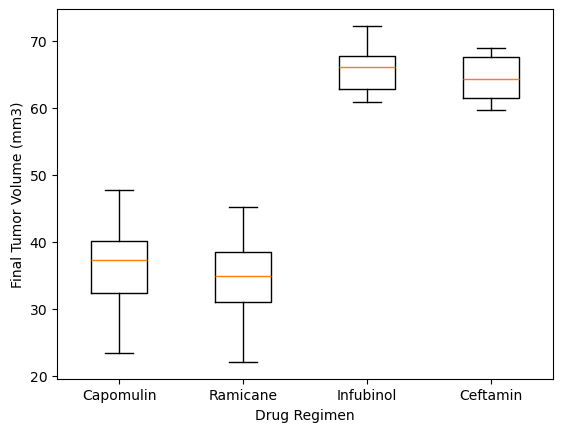

In [15]:
# get data for boxplot and put in a DataFrame
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
Capomulin = last_timepoint.loc[last_timepoint['Drug Regimen']=='Capomulin', 'Tumor Volume (mm3)'].to_numpy()
Ramicane = last_timepoint.loc[last_timepoint['Drug Regimen']=='Ramicane', 'Tumor Volume (mm3)'].to_numpy()
Infubinol = last_timepoint.loc[last_timepoint['Drug Regimen']=='Infubinol', 'Tumor Volume (mm3)'].to_numpy()
Ceftamin = last_timepoint.loc[last_timepoint['Drug Regimen']=='Ceftamin', 'Tumor Volume (mm3)'].to_numpy()

boxplot_data = [Capomulin, Ramicane, Infubinol, Ceftamin]

# create boxplot
fig, ax1 = plt.subplots()
bp = ax1.boxplot(boxplot_data, labels=treatments)
ax1.set(xlabel='Drug Regimen', ylabel='Final Tumor Volume (mm3)')
plt.setp(bp['fliers'], color='red', marker='o')
plt.show()

## Line and Scatter Plots

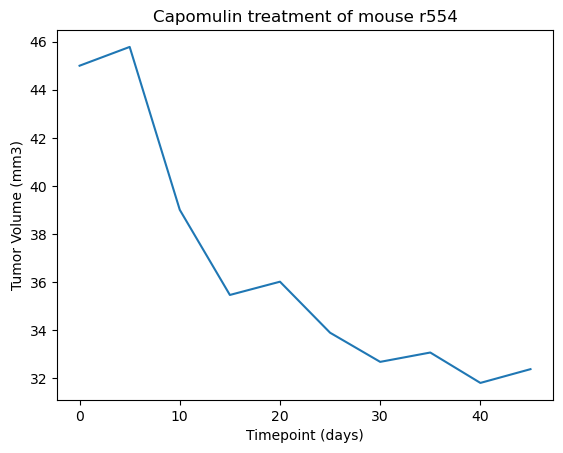

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'r554'
mouse_df = df[df['Mouse ID']==mouse_id].reset_index(drop=True)

title = mouse_df['Drug Regimen'][0] + ' treatment of mouse ' + mouse_id

mouse_df.plot(x='Timepoint', y='Tumor Volume (mm3)', kind='line', xlabel='Timepoint (days)', ylabel='Tumor Volume (mm3)', title=title, legend=False)
plt.show()

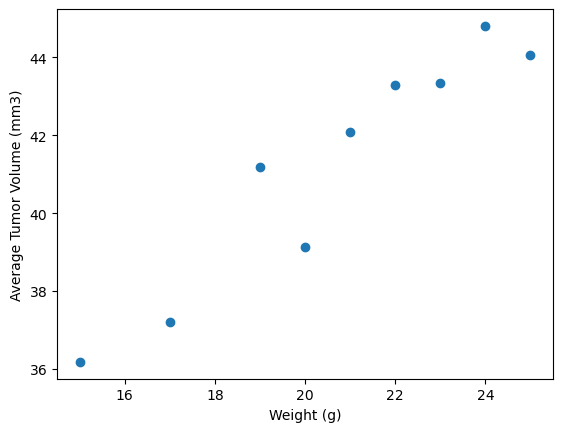

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_df = df[df['Drug Regimen']=='Capomulin']
weights = cap_df['Weight (g)'].unique()
averages = [cap_df.loc[cap_df['Weight (g)']==weight,'Tumor Volume (mm3)'].mean() for weight in weights]

plt.scatter(x=weights, y=averages, marker='o')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [18]:
cap_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(cap_df['Weight (g)'],cap_df['Tumor Volume (mm3)'])

print(f"r-squared: {round(rvalue**2,4)}")
print(f"linear regression model for Capomulin regimen: Tumor Volume (mm3) = {round(slope,2)}*[Weight (g)] + {round(intercept,2)}")  

r-squared: 0.2764
linear regression model for Capomulin regimen: Tumor Volume (mm3) = 0.96*[Weight (g)] + 21.49
